In [1]:
#pip install ipython-autotime
%load_ext autotime

time: 3.27 ms (started: 2021-04-17 07:22:36 +00:00)


# GDrive Connection

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 6.17 ms (started: 2021-04-17 07:22:37 +00:00)


In [3]:
%cd "drive/MyDrive/SpringBoard/Sample Projects/Turnover Datasets/Techco Employee attrition"

/content/drive/MyDrive/SpringBoard/Sample Projects/Turnover Datasets/Techco Employee attrition
time: 24.3 ms (started: 2021-04-17 07:22:37 +00:00)


# Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

time: 419 ms (started: 2021-04-17 07:22:37 +00:00)


In [5]:
df = pd.read_csv('employee_turnover_techco.csv')

time: 49.8 ms (started: 2021-04-17 07:22:37 +00:00)


In [6]:
df.head()

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id,turnover
0,1,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
1,2,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
2,3,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
3,4,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed
4,5,4.840446,5,2,81.05207,6,1.635494,24.11053,1,1,Stayed


time: 40.2 ms (started: 2021-04-17 07:22:37 +00:00)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34452 entries, 0 to 34451
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   time              34452 non-null  int64  
 1   training_score    34452 non-null  float64
 2   logical_score     34452 non-null  int64  
 3   verbal_score      34452 non-null  int64  
 4   avg_literacy      34452 non-null  float64
 5   location_age      34452 non-null  int64  
 6   distance          34452 non-null  float64
 7   similar_language  34452 non-null  float64
 8   is_male           34452 non-null  int64  
 9   emp_id            34452 non-null  int64  
 10  turnover          34452 non-null  object 
dtypes: float64(4), int64(6), object(1)
memory usage: 2.9+ MB
time: 16.8 ms (started: 2021-04-17 07:22:37 +00:00)


Data looks uniform and fairly clean with no null values in any of the columns and appropritate dtypes for most columns

In [8]:
df.describe()

,time,training_score,logical_score,verbal_score,avg_literacy,location_age,distance,similar_language,is_male,emp_id
count,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000,34452.000000
mean,17.046529,4.496400,4.373999,4.650615,75.583604,15.344276,0.833396,59.186507,0.567804,599.649454
std,10.320377,0.435643,3.905698,4.472608,9.196516,7.919007,0.762817,35.286223,0.495388,340.873215
min,1.000000,2.688673,-5.000000,-7.000000,49.354540,2.000000,0.000000,1.250000,0.000000,1.000000
25%,8.000000,4.263266,1.000000,1.000000,68.548850,9.000000,0.191342,27.132500,0.000000,311.000000
50%,16.000000,4.578397,4.000000,4.000000,77.009510,11.000000,0.589657,49.118420,1.000000,603.000000
75%,26.000000,4.829628,8.000000,8.000000,82.778083,24.000000,1.316585,98.816540,1.000000,890.000000
max,39.000000,5.110679,12.000000,17.000000,97.357410,28.000000,3.200019,100.000000,1.000000,1191.000000


time: 73.7 ms (started: 2021-04-17 07:22:37 +00:00)


## Column Description

*   time - number of months at the company
*   training_score - employee's performance scores in an intensive 3 months on boarding training coarse
*   logical_score - standardized univeristy exit exam score
*   verbal_score - standardized university exit exam score
*   avg_literacy - average literacy in the employee's home region
*   location_age - the age of the emplotee;s assigned production center
*   distance - distance between the employee;s home and their quasi-randomly assigned production center
*   similar_language - the similarity of the prevailing language in the production center's region to that of the employee's hometown
*   is_male - male=1, female=0
*   emp_id - identifying number for each employee
turnover









In [9]:
# Renaming columns and reformating columns to readible dtypes and values
df = df.rename(columns={'time':'months', 'is_male':'gender'})
df['turnover'] = df['turnover'].astype('category').cat.codes

time: 11.9 ms (started: 2021-04-17 07:22:37 +00:00)


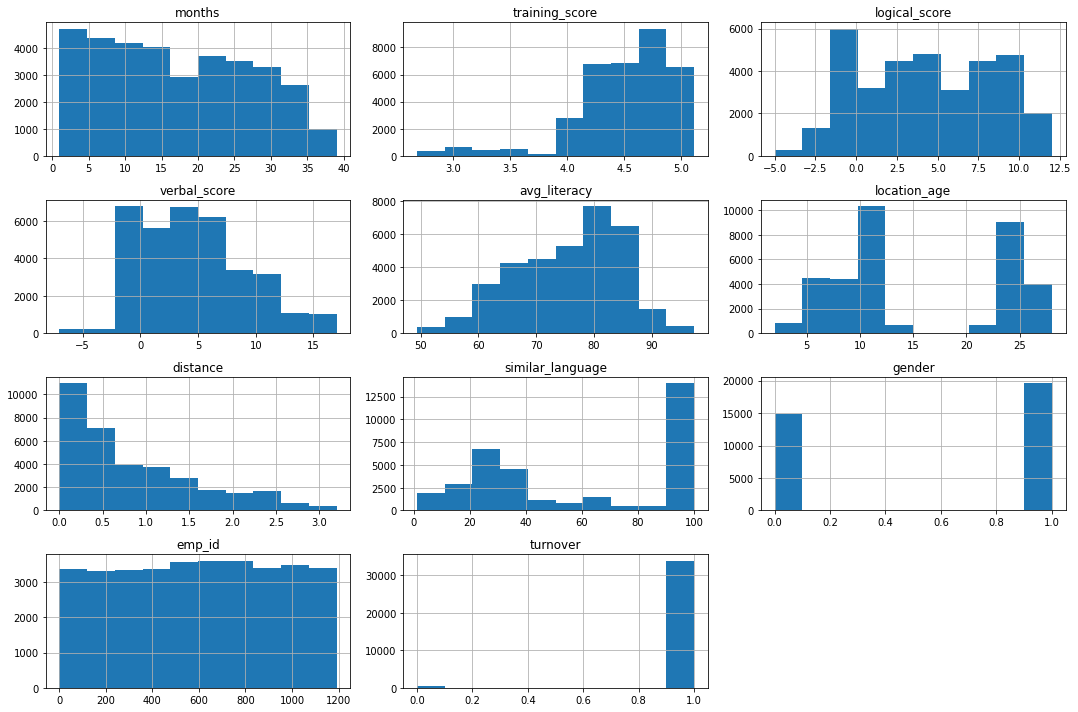

time: 2.82 s (started: 2021-04-17 07:22:37 +00:00)


In [10]:
df.hist(figsize=(15,10))
plt.tight_layout()

In [11]:
print(df['turnover'].value_counts())
df['turnover'].value_counts(normalize=True)

1    33958
0      494
Name: turnover, dtype: int64


1    0.985661
0    0.014339
Name: turnover, dtype: float64

time: 17.6 ms (started: 2021-04-17 07:22:40 +00:00)


As seen in the above values and graph, the turnover rate in this company is abnormally high. This caused the feature to be skewed and resulted in an imbalance class which would decrease accuracy of future models.

# Testing Methods to deal with imbalance output data

### Comparing upscaling and downscaling imblance class

In [12]:
from sklearn.utils import resample

# Upscaling Minority Class in turnover
df_majority = df[df['turnover'] == 1]
df_minority = df[df['turnover'] == 0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=33958, random_state=123) # Unsample minority class, upscale to match majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled]) # Merging up-scaled minority class
print('turnover distribution %: \n {}'.format(df_upsampled['turnover'].value_counts(normalize=True))) # Checking out turnover distribution


# Downscaling Majority Class in turnover
df_majority = df[df['turnover'] == 1]
df_minority = df[df['turnover'] == 0]

df_majority_downsampled = resample(df_majority, replace=True, n_samples=494, random_state=123)
df_downsampled = pd.concat([df_minority, df_majority_downsampled])
print('turnover distribution %: \n {}'.format(df_downsampled['turnover'].value_counts(normalize=True)))

turnover distribution %: 
 1    0.5
0    0.5
Name: turnover, dtype: float64
turnover distribution %: 
 1    0.5
0    0.5
Name: turnover, dtype: float64
time: 75.2 ms (started: 2021-04-17 07:22:40 +00:00)


#### Model Accuracy

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Orignal
y1 = df['turnover']
x1 = df.drop('turnover', axis=1)

clr_1 = LogisticRegression().fit(x1, y1)
pred_y1 = clr_1.predict(x1)

print('Accuracy score: {}'.format(accuracy_score(pred_y1, y1)))

#Upscaled
y2 = df_upsampled['turnover']
x2 = df_upsampled.drop('turnover', axis=1)

clr_2 = LogisticRegression().fit(x2, y2)
pred_y2 = clr_2.predict(x2)

print('Accuracy score: {}'.format(accuracy_score(pred_y2, y2)))

# Downscaled
y3 = df_downsampled['turnover']
x3 = df_downsampled.drop('turnover', axis=1)

clr_3 = LogisticRegression().fit(x3, y3)
pred_y3 = clr_3.predict(x3)

print('Accuracy score: {}'.format(accuracy_score(pred_y3, y3)))

Accuracy score: 0.9856612097991408
Accuracy score: 0.6304994404853054
Accuracy score: 0.6447368421052632
time: 2.2 s (started: 2021-04-17 07:22:40 +00:00)


#### Performance Metrics

In [14]:
from sklearn.metrics import roc_auc_score

#Original
prob_y1 = clr_2.predict_proba(x1) # Predict class probabilities
prob_y1 = [i[1] for i in prob_y1] # Keeping positive class only

print('Original ROC score: {}'.format(roc_auc_score(y1, prob_y1)))

#Upscaled
prob_y2 = clr_2.predict_proba(x2)
prob_y2 = [i[1] for i in prob_y2]

roc_auc_score(y2, prob_y2)
print('Upscaled ROC score: {}'.format(roc_auc_score(y2, prob_y2)))

#Downscaled
prob_y3 = clr_3.predict_proba(x3)
prob_y3 = [i[1] for i in prob_y3]

print('Downscaled ROC score: {}'.format(roc_auc_score(y3, prob_y3)))

Original ROC score: 0.6849303366649873
Upscaled ROC score: 0.684423203587296
Downscaled ROC score: 0.6964054483764691
time: 184 ms (started: 2021-04-17 07:22:43 +00:00)


The accuracy metrics for upscaled class was lower than downscaled class. The original data obviusly has the highest accuracy to model score. However, the model is no longer predicting just one class which would provide a more meaningful performance metric. 

When comparing performance metrics, the downscaled data tops the charts. However, all 3 datasets performed relatively close to each other and all passed the minimum score of 0.5.

# Machine Learning

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve, cross_val_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, confusion_matrix, plot_roc_curve

time: 2.08 ms (started: 2021-04-17 07:22:43 +00:00)


## Defining features

In [16]:
features = df.drop(columns=['emp_id','turnover'], axis=1)
X = features
y = df['turnover']

time: 6.27 ms (started: 2021-04-17 07:22:43 +00:00)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Feature Scaling:
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

time: 29.5 ms (started: 2021-04-17 07:22:43 +00:00)


## ML models

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

C_param_range = [0.001,0.01,0.1,1,10,100]
table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(penalty='l2', C=i, random_state=123)
    lr.fit(X_train, y_train)
    
    # Predict using model
    y_pred_lr = lr.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test, y_pred_lr)
    j += 1
    
table

,C_parameter,Accuracy
0,0.001,0.985971
1,0.010,0.985971
2,0.100,0.985971
3,1.000,0.985971
4,10.000,0.985971
5,100.000,0.985971


time: 489 ms (started: 2021-04-17 07:22:43 +00:00)


In [19]:
matrix_lr = confusion_matrix(y_test,y_pred_lr)
print('Confusion Matrix: {}'.format(matrix_lr))

accuracy_lr = lr.score(X_test,y_test)
print('Accuracy score: {}'.format(accuracy_lr))

# Cross validation
cv_scores_test = cross_val_score(lr, X_test, y_test, cv=5, scoring='roc_auc')
cv_scores_train = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
print('Cross validation score: {}'.format(cv_scores_test))

cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()

print ('Mean CV test score: {}'.format(cv_scores_test.mean()))
print ('Mean CV train score: {}'.format(cv_scores_train.mean()))
print ('Std Cv test scores: {}'.format(cv_scores_test.std()))

Confusion Matrix: [[    0   145]
 [    0 10191]]
Accuracy score: 0.9859713622291022
Cross validation score: [0.7179652  0.64713546 0.62896349 0.64469899 0.69765829]
Mean CV test score: 0.6672842848273097
Mean CV train score: 0.6741950008220846
Std Cv test scores: 0.03428028198605096
time: 623 ms (started: 2021-04-17 07:22:43 +00:00)


### KNN - K-Neaerest Neighbor

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Setup model, train (euclidean), and predict
knn = KNeighborsClassifier(p=2, weights='distance', n_neighbors=400)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)

matrix_knn = confusion_matrix(y_test, y_predict_knn)
print('Confusion Matrix: {}'.format(matrix_knn))

accuracy_knn = knn.score(X_test,y_test)
print('Accuracy score: {}'.format(accuracy_knn))

# Cross validation
cv_scores_test = cross_val_score(knn, X_test, y_test, cv=5, scoring='roc_auc')
cv_scores_train = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')
print('Cross validation score: {}'.format(cv_scores_test))

cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()

print ('Mean CV test score: {}'.format(cv_scores_test.mean()))
print ('Mean CV train score: {}'.format(cv_scores_train.mean()))
print ('Std Cv test scores: {}'.format(cv_scores_test.std()))

Confusion Matrix: [[    0   145]
 [    0 10191]]
Accuracy score: 0.9859713622291022
Cross validation score: [0.64571037 0.63843017 0.70884234 0.70434165 0.60400663]
Mean CV test score: 0.6602662326121461
Mean CV train score: 0.6644441116539445
Std Cv test scores: 0.040388388437624
time: 19.4 s (started: 2021-04-17 07:22:44 +00:00)


### SVM - Support Vector Machine

In [21]:
from sklearn.svm import SVC

# Setup model, train, and predict
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_predict_svm = svm.predict(X_test)

matrix_svm = confusion_matrix(y_test, y_predict_svm)
print('Confusion Matrix: {}'.format(matrix_svm))

accuracy_svm = svm.score(X_test,y_test)
print('Accuracy score: {}'.format(accuracy_svm))

# Cross validation
cv_scores_test = cross_val_score(svm, X_test, y_test, cv=5, scoring='roc_auc')
cv_scores_train = cross_val_score(svm, X_train, y_train, cv=5, scoring='roc_auc')
print('Cross validation score: {}'.format(cv_scores_test))

cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()

print ('Mean CV test score: {}'.format(cv_scores_test.mean()))
print ('Mean CV train score: {}'.format(cv_scores_train.mean()))
print ('Std Cv test scores: {}'.format(cv_scores_test.std()))

Confusion Matrix: [[    0   145]
 [    0 10191]]
Accuracy score: 0.9859713622291022
Cross validation score: [0.56095787 0.44707455 0.54383946 0.55510812 0.55974417]
Mean CV test score: 0.533344835104319
Mean CV train score: 0.5501435491396404
Std Cv test scores: 0.04355627345913662
time: 2.08 s (started: 2021-04-17 07:23:04 +00:00)


### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Setup model, train, and predict
rf = RandomForestClassifier(bootstrap=True, n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

matrix_rf = confusion_matrix(y_test, y_predict_rf)
print('Confusion Matrix: {}'.format(matrix_rf))

accuracy_rf = rf.score(X_test,y_test)
print('Accuracy score: {}'.format(accuracy_rf))

# Cross validation
cv_scores_test = cross_val_score(rf, X_test, y_test, cv=5, scoring='roc_auc')
cv_scores_train = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
print('Cross validation score: {}'.format(cv_scores_test))

cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()

print ('Mean CV test score: {}'.format(cv_scores_test.mean()))
print ('Mean CV train score: {}'.format(cv_scores_train.mean()))
print ('Std Cv test scores: {}'.format(cv_scores_test.std()))

Confusion Matrix: [[    0   145]
 [   28 10163]]
Accuracy score: 0.9832623839009288
Cross validation score: [0.65524006 0.67603465 0.70499306 0.61017394 0.71123651]
Mean CV test score: 0.6715356435932931
Mean CV train score: 0.7032225780693186
Std Cv test scores: 0.0367331011755986
time: 26.2 s (started: 2021-04-17 07:23:06 +00:00)


### Gradient Boosting

In [23]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

# Setup model, train, and predict
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)
y_predict_gbc = gbc.predict(X_test)

matrix_gbc = confusion_matrix(y_test, y_predict_gbc)
print('Confusion Matrix: {}'.format(matrix_gbc))

accuracy_gbc = gbc.score(X_test, y_test)
print('Accuracy score: {}'.format(accuracy_gbc))

# Cross validation
cv_scores_test = cross_val_score(gbc, X_test, y_test, cv=5, scoring='roc_auc')
cv_scores_train = cross_val_score(gbc, X_train, y_train, cv=5, scoring='roc_auc')
print('Cross validation score: {}'.format(cv_scores_test))

cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()

print ('Mean CV test score: {}'.format(cv_scores_test.mean()))
print ('Mean CV train score: {}'.format(cv_scores_train.mean()))
print ('Std Cv test scores: {}'.format(cv_scores_test.std()))

Confusion Matrix: [[    1   144]
 [   28 10163]]
Accuracy score: 0.983359133126935
Cross validation score: [0.64020565 0.70703191 0.70803865 0.64323542 0.64273629]
Mean CV test score: 0.6682495822012531
Mean CV train score: 0.7050489272459941
Std Cv test scores: 0.03209466419843047
time: 1min 31s (started: 2021-04-17 07:23:32 +00:00)


### Naive bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

# Setup model, train, and predict
nb = GaussianNB()
nb.fit(X_train,y_train)
y_predict_nb = nb.predict(X_test)

matrix_nb = confusion_matrix(y_test, y_predict_nb)
print('Confusion Matrix: {}'.format(matrix_nb))

accuracy_nb = nb.score(X_test,y_test)
print('Accuracy score: {}'.format(accuracy_nb))

# Cross validation
cv_scores_test = cross_val_score(nb, X_test, y_test, cv=5, scoring='roc_auc')
cv_scores_train = cross_val_score(nb, X_train, y_train, cv=5, scoring='roc_auc')
print('Cross validation score: {}'.format(cv_scores_test))

cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()

print ('Mean CV test score: {}'.format(cv_scores_test.mean()))
print ('Mean CV train score: {}'.format(cv_scores_train.mean()))
print ('Std Cv test scores: {}'.format(cv_scores_test.std()))

Confusion Matrix: [[    9   136]
 [  144 10047]]
Accuracy score: 0.9729102167182663
Cross validation score: [0.67791852 0.64539271 0.68249805 0.63926771 0.72703123]
Mean CV test score: 0.6744216451657237
Mean CV train score: 0.6705007731966229
Std Cv test scores: 0.03138057929122462
time: 165 ms (started: 2021-04-17 07:25:03 +00:00)


## Model Comparison

In [25]:
labels = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Gradient Boost', 'Naive Bayes']
score_test= [cv_scores_lr_test, cv_scores_knn_test, cv_scores_svm_test, cv_scores_rf_test, cv_scores_gbc_test, cv_scores_nb_test]
score_train= [cv_scores_lr_train, cv_scores_knn_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_nb_train]
Accuracy_score = [accuracy_lr, accuracy_knn, accuracy_svm, accuracy_rf, accuracy_gbc, accuracy_nb]

scores = pd.DataFrame(list(zip(labels, Accuracy_score, score_train, score_test)), columns =['Algorithm', 'Model accuracy score', 'ROC-AUC train score', 'ROC-AUC test score']) 

scores

,Algorithm,Model accuracy score,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.985971,0.674195,0.667284
1,KNN,0.985971,0.664444,0.660266
2,SVM,0.985971,0.550144,0.533345
3,Random Forest,0.983262,0.703223,0.671536
4,Gradient Boost,0.983359,0.705049,0.668250
5,Naive Bayes,0.972910,0.670501,0.674422


time: 29 ms (started: 2021-04-17 07:25:04 +00:00)


### Visual Comparison

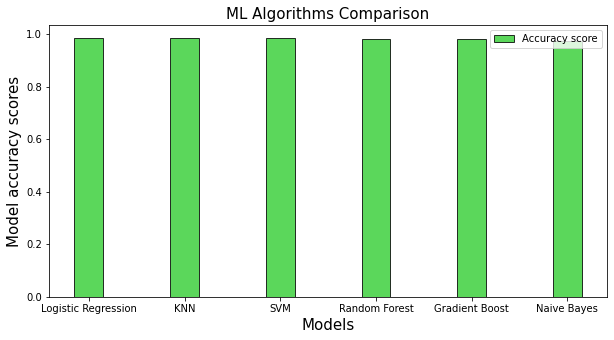

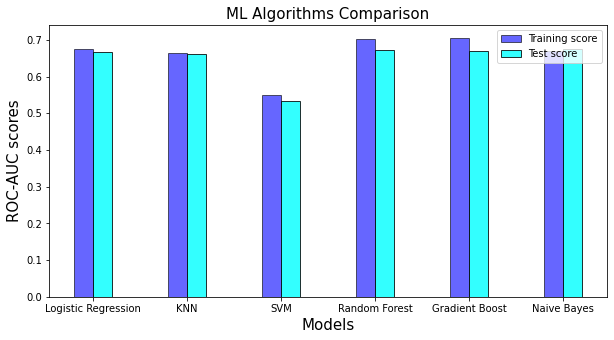

time: 477 ms (started: 2021-04-17 07:25:04 +00:00)


In [26]:
# ML algorithms visual comparison
index_01 = [1, 2, 3, 4, 5, 6]
index_02 = [1.1, 2.1, 3.1, 4.1, 5.1, 6.1]
index_03 = [1.2, 2.2, 3.2, 4.2, 5.2, 6.2]

# Accuracy scores visual comparison
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('ML Algorithms Comparison',fontsize=15)
_ = plt.bar(index_01, Accuracy_score, color='#32CD32', alpha=0.8, label='Accuracy score', edgecolor='k', width=0.3)
plt.xticks(index_01, labels)
plt.legend(loc='best')
#plt.savefig("accuracy.png")
plt.show()

# ROC-AUC train/test scores visual comparison
plt.figure(figsize=(10,5))
plt.xlabel('Models', fontsize=15)
plt.ylabel ('ROC-AUC scores', fontsize=15)
plt.title('ML Algorithms Comparison', fontsize=15)
_=plt.bar(index_01, score_train, color='b', alpha=0.6, label='Training score', edgecolor='k', width=0.2)
_=plt.bar(index_03, score_test, color='cyan', alpha=0.8, label='Test score', edgecolor='k', width=0.2)
plt.xticks(index_02, labels)
plt.legend(loc='best')
#plt.savefig("roc.png")
plt.show()

## Hyperparameters Tuning

### RF 


In [27]:
rf = RandomForestClassifier(max_features='auto', random_state=1, n_jobs=-1)

param_grid = {"criterion":["gini", "entropy"], 
              "min_samples_leaf":[1, 5, 10], 
              "min_samples_split":[2, 4, 10, 12], 
              "n_estimators":[100, 200, 300]}

rf_tuned = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

rf_tuned.fit(X_train, y_train)

print('Best estimator: {}'.format(rf_tuned.best_estimator_), '\n', 
      'Best score: {}'.format(rf_tuned.best_score_))

Best estimator: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 
 Best score: 0.9855282816498483
time: 11min 12s (started: 2021-04-17 07:25:04 +00:00)


In [28]:
rf = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred_rf)
cv_score = cross_val_score(rf, X_test, y_test, scoring='roc_auc').mean()

print ('Accuracy score: {}'.format(acc_score))
print ('CV scores: {}'.format(cv_score))

Accuracy score: 0.985874613003096
CV scores: 0.6826002831091971
time: 7.26 s (started: 2021-04-17 07:36:17 +00:00)


In [29]:
# Final prediction rf
target = pd.Series(y_pred_rf, name='turnover')
user_id = df['emp_id']

rf_prediction = pd.DataFrame(list(zip(user_id, target)), columns =['emp_id', 'turnover']) 

rf_prediction.to_csv('rf_turnover_prediction.csv', index=False, header=True)

time: 47.3 ms (started: 2021-04-17 07:36:24 +00:00)


#### Feature Rating

In [30]:
rating = list(rf.feature_importances_)
rates = np.sort(rating)
aa = pd.DataFrame(list(zip(X, rates)), columns=['Features', 'Imporatance Rating'])
aa

,Features,Imporatance Rating
0,months,0.007911
1,training_score,0.030810
2,logical_score,0.035491
3,verbal_score,0.036938
4,avg_literacy,0.054398
5,location_age,0.059058
6,distance,0.064033
7,similar_language,0.309932
8,gender,0.401429


time: 21.1 ms (started: 2021-04-17 07:36:24 +00:00)


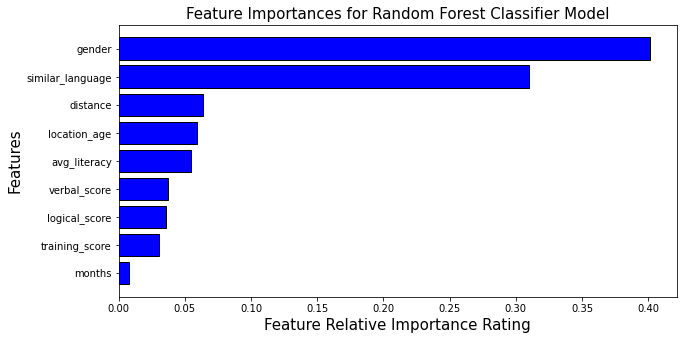

time: 220 ms (started: 2021-04-17 07:36:24 +00:00)


In [31]:
index = [0,1,2,3,4,5,6,7,8]

plt.figure(figsize=(10,5))
_=plt.barh(index, rates, align='center',color='b', edgecolor='k')
plt.xlabel('Feature Relative Importance Rating', fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest Classifier Model', fontsize=15)
#plt.savefig("rf_feature_rating.png")

plt.show()

#### ROC-AUC score

In [32]:
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
roc_auc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score: ", roc_auc)

ROC-AUC Score:  0.7385475351814819
time: 67.8 ms (started: 2021-04-17 07:36:25 +00:00)


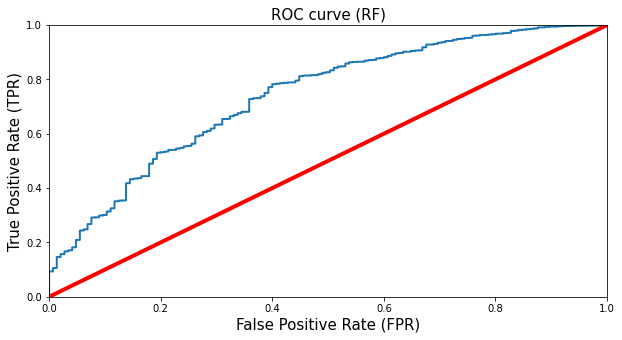

time: 229 ms (started: 2021-04-17 07:36:25 +00:00)


In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)', fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
#plt.savefig("rf_roc_curve.png")
plt.show()

### GBC

In [34]:
gbc = GradientBoostingClassifier()
param_grid = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gbc_tuned = GridSearchCV(gbc, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gbc_tuned.fit(X_train,y_train)

print('Best estimator: {}'.format(gbc_tuned.best_estimator_), '\n', 
      'Best score: {}'.format(gbc_tuned.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.3min finished


Best estimator: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=0.3, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 
 Best score: 0.98556973585982
time: 6min 22s (started: 2021-04-17 07:36:25 +00:00)


In [35]:
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=0.1, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=150, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
acc_score = accuracy_score(y_test, y_pred_gbc)
cv_score = cross_val_score(gbc, X_test, y_test, scoring='roc_auc').mean()

print ('Accuracy score: {}'.format(acc_score))
print ('CV scores: {}'.format(cv_score))

Accuracy score: 0.985874613003096
CV scores: 0.6787272173198582
time: 7.3 s (started: 2021-04-17 07:42:47 +00:00)


In [36]:
# Final prediction GBC
target = pd.Series(y_pred_gbc, name='turnover')
user_id = df['emp_id']

gbc_prediction = pd.DataFrame(list(zip(user_id, target)), columns =['emp_id', 'turnover']) 

gbc_prediction.to_csv('gbc_turnover_prediction.csv', index=False, header=True)

time: 41.1 ms (started: 2021-04-17 07:42:54 +00:00)


#### Feature Rating

In [37]:
rating = list(gbc.feature_importances_)
rates = np.sort(rating)
bb = pd.DataFrame(list(zip(X, rates)), columns=['Features', 'Imporatance Rating'])
bb

,Features,Imporatance Rating
0,months,0.011413
1,training_score,0.032691
2,logical_score,0.034735
3,verbal_score,0.041003
4,avg_literacy,0.053644
5,location_age,0.055331
6,distance,0.057828
7,similar_language,0.323428
8,gender,0.389928


time: 18 ms (started: 2021-04-17 07:42:54 +00:00)


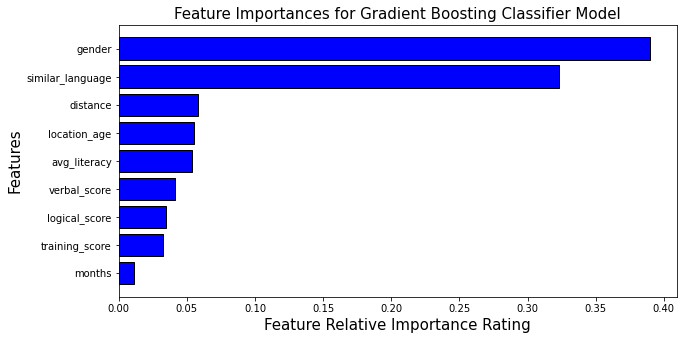

time: 217 ms (started: 2021-04-17 07:42:54 +00:00)


In [38]:
index = [0,1,2,3,4,5,6,7,8]

plt.figure(figsize=(10,5))
_=plt.barh(index, rates, align='center',color='b', edgecolor='k')
plt.xlabel('Feature Relative Importance Rating', fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient Boosting Classifier Model', fontsize=15)
#plt.savefig("gbc_feature_rating.png")

plt.show()

#### ROC-AUC score

In [39]:
y_scores_gbc = gbc.predict_proba(X_test)
y_scores_gbc = y_scores_gbc[:,1]
roc_auc = roc_auc_score(y_test, y_scores_gbc)
print("ROC-AUC Score: ", roc_auc)

ROC-AUC Score:  0.7343504579767814
time: 69.7 ms (started: 2021-04-17 07:42:55 +00:00)


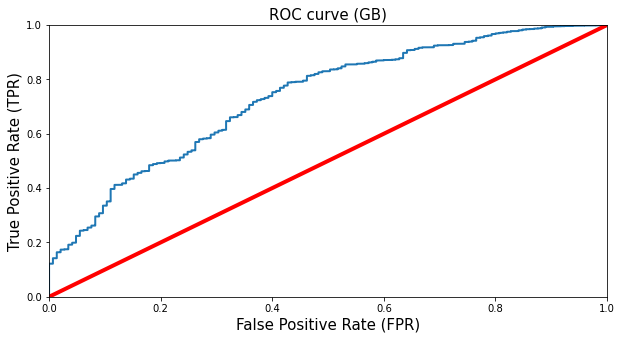

time: 333 ms (started: 2021-04-17 07:42:55 +00:00)


In [40]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_gbc)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)', fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
#plt.savefig("gbc_roc_curve.png")
plt.show()

## Conclusion

In this notebook, I have solved the classification problem using:

*   Logistic Regression (LR)
*   KK-Nearest Neighbor (KNN)
*   Support Vector Machine (SVM)
*   Random Forest (RF)
*   Naive Bayes (NB)
*   Gradient Boosting (GB)

Out of all the algorithms used, SVM showed the lowest ROC-AUC scores. Although I have selected the RF and GB as my method of modeling due to its high ROC-AUC scores, I know that this may not neccessarily by the best solution as the model could be overfitting.<br><br>

The used of Cross Validation in this notebook is to prevent overfitting of model on the same dataset. This method splits training set into k-smaller sets where the models are trained using k-number of folds and predictions are validated on remaining testing sets.<br><br>

Noticed that the hyperparameters of the GB algorithm was not too fine-tuned. This is because my current setup does not allow me to perform too many computations to achieve optimized hyperparameters.<br><br>

The final turnover prediction was saved into a csv file (gbc_turnover_prediction.csv).






### Improvements / Suggestions

This is a relatively small dataset, therefore there is room for improvement if more data were to be trained.

Other improvements that could be made to achieve results would be to test out other ML models such as Extreme Gradient Boosting Classifier Model.